<a href="https://colab.research.google.com/github/cej34567/AI_STUDY/blob/main/linear/%EB%8B%A8%EC%88%9C%2C%20%EB%8B%A4%EC%A4%91%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80(%2B%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**keras**

딥러닝 라이브러리, 사용하기 쉬운 고차원 딥러닝 api

**머신러닝**: 입력을 결함하여 이전에 본 적이 없는 데이터를 적절히 예측/분류하는 방법을 학습


1.   지도학습: 입력, 정답 존재
2.   비지도 학습: 입력만 있다.
3. 강화학습: 상호 피드백을 통해 최적의 동작 학습

**Supervised learning**

레이블이 주어지고 학습 시키는 것(예시를 들어주며 학습 시킴)

supervised learning types



1.   regression(점수 예측, 1~100)
2.   binary classification(pass or non-pass)
3.   letter grade(A,B,C,E and F)-많은 레이블(multi label classification)



**Unsupervised learning**

레이블이 주어지지 않고 학습 시킴

모델 구성 전 예측인가 분류인가를 고려



*   선형회귀
*   로지스틱 회귀: 이진 분류
*   소프트맥스 회귀: 다중 클래스 분류


1.   문제 가정/정의 
2.   데이터 셋 생성(numpy, pandas..)  
3.   model=Sequential()
4.   모델 구성(model.add()
5.   학습과정 설정_model.compile()
6.   모델 학습_model.fit()
7.   모델 평가_model.evaluate()
8.   모델 예측_model.predict()


**선형회귀**
1. Regression(후퇴, 퇴보): 전체 데이터는 결국 평균의 값으로 되돌아간다.

    **linear regression**

    y=ax+b

**하이퍼파라미터**

사용자가 정의, 매개변수



*   활성화 함수: activation(linear, sigmoid, relu
*   손실함수_비용함수: loss(mse, binary_crossentropy, categorical_crossentropy)
* 최적화 방법: optimizer(GD_경사하강법, SGD_확률적 경사하강법), Momentum 등
* lr, batch_size, epochs, opverfiting(과적합), one_hot_encodeing, 정규화


**경사하강법**
1. 최적화: 경사가 감소되듯이 기울기가 점차 초저점 방향으로 감소
2. 학습률
**확률적 경사하강법** SGD

매 step에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 gradient를 계산

방향성이 없다는 단점이 있다.

-------------------------------------------

경사하강법의 문제점과 개선 알고리즘

딥러닝 신경망에서는 모양이 하나의 그릇처러 볼록하지 않다.
여러 개의 볼록한 모양으로 볼 수 있다. 최솟값이 여러개 있다.

문제점을 개선하기 위해 **Momentum, Adagrad, RMSprop, Adam** 등이 있다.


In [ ]:
#simple linear regression

#buil hypothesis and cost
#h(x)=Wx+b
import tensorflow as tf

x_data=[1,2,3,4,5]
y_data=[1,2,3,4,5]
#입력값과 출력값이 같기 위해선 w=1, b=0

#임의로 값 지정
W=tf.Variable(2.9)
b=tf.Variable(0.5)

hypothesis=W*x_data+b
cost=tf.reduce_mean(tf.square(hypothesis-y_data))




for i in range(500):
  #gradient descent=경사하강법 > min cost(W,b)를 찾음

  #learnint_rate initialize
  learning_rate=0.01

  #gradient descent
  with tf.GradientTape() as tape:
    hypothesis=W*x_data+b
    cost=tf.reduce_mean(tf.square(hypothesis-y_data))
  #with구문에서 변하는 값들을 tape에 저장

  #tape에 저장된 값들을 미분하여 저장, 즉 w, b 에 대한 미분한 값들을 저장
  W_grad, b_grad=tape.gradient(cost, [W, b])

  W.assign_sub(learning_rate*W_grad)
  b.assign_sub(learning_rate*b_grad)
  #A.assign_sub(B)  =   A=A-B   A-=B

  if i%10==0:
    print('{:5}|{:10.4}{:10.4}|{:10.6f}'.format(i, W.numpy(), b.numpy(), cost))

    0|     2.452     0.376| 45.660004
   10|     1.104  0.003398|  0.206336
   20|     1.013  -0.02091|  0.001026
   30|     1.007  -0.02184|  0.000093
   40|     1.006  -0.02123|  0.000083
   50|     1.006  -0.02053|  0.000077
   60|     1.005  -0.01984|  0.000072
   70|     1.005  -0.01918|  0.000067
   80|     1.005  -0.01854|  0.000063
   90|     1.005  -0.01793|  0.000059
  100|     1.005  -0.01733|  0.000055
  110|     1.005  -0.01675|  0.000051
  120|     1.004  -0.01619|  0.000048
  130|     1.004  -0.01566|  0.000045
  140|     1.004  -0.01513|  0.000042
  150|     1.004  -0.01463|  0.000039
  160|     1.004  -0.01414|  0.000037
  170|     1.004  -0.01367|  0.000034
  180|     1.004  -0.01322|  0.000032
  190|     1.004  -0.01278|  0.000030
  200|     1.003  -0.01235|  0.000028
  210|     1.003  -0.01194|  0.000026
  220|     1.003  -0.01154|  0.000024
  230|     1.003  -0.01116|  0.000023
  240|     1.003  -0.01079|  0.000021
  250|     1.003  -0.01043|  0.000020
  260|     1

In [ ]:
#단순 선형회귀
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

#데이터셋 설정
s_time=np.array([1,2,3,4,5,6])
s_result=np.array([10,20,30,40,50,60])

#모델 구성
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
#선형회귀 모델, Dense는 계층을 의미

#모델 컴파일
sgd=optimizers.SGD(lr=0.01)
#학습률같이 값을 정의하는 갓을 하이퍼파라미터라고 한다.
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

#모델 학습
model.fit(s_time, s_result, batch_size=1, epochs=100, shuffle=False)

#모델 예측
print(model.predict([7]))
#공부시간이 7시간일 때 예상 점수

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 419.3805 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 1.8263 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 1ms/step - loss: 1.2040 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 1.1934 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 1.1416 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0896 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 1.0398 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 0.9922 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 0.9468 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9035 - accuracy

In [ ]:
# #모델 계층 추가
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from keras import optimizers

# #데이터셋 설정
# s_time=np.array([1,2,3,4,5,6])
# s_result=np.array([10,20,30,40,50,60])

# #모델 구성
# model=Sequential()
# model.add(Dense(3, input_dim=1, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# #모델 컴파일
# sgd=optimizers.SGD(lr=0.01) #학습률같이 값을 정의해 넣는 것을 하이퍼파라미터라고 한다.
# model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# #모델 학습
# model.fit(s_time, s_result, batch_size=1, epochs=100, shuffle=False)

# #모델 예측
# print(model.predict([7])) #공부시간이 7시간일 때 예상 점수는?

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 1450.3868 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 958us/step - loss: 1448.3364 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 935us/step - loss: 1448.0846 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 1447.9814 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 1ms/step - loss: 1447.9222 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 976us/step - loss: 1447.8818 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 1447.8524 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 958us/step - loss: 1447.8300 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 1447.8121 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 8

In [30]:
import numpy as np

x=np.array([1,2,3])
y=np.array([1,2,3])

def cost_func(w, x, y):
  c=0
  for i in range(len(x)):
    c+=(w+x[i]-y[i])**2
  return c/len(x)

for feed_w in np.linspace(-3, 5, num=15):
  curr_cost=cost_func(feed_w, x, y)
  print('{:6.3f} | {:10.5f}'.format(feed_w, curr_cost))

print('-----------------------------------------')



-3.000 |    9.00000
-2.429 |    5.89796
-1.857 |    3.44898
-1.286 |    1.65306
-0.714 |    0.51020
-0.143 |    0.02041
 0.429 |    0.18367
 1.000 |    1.00000
 1.571 |    2.46939
 2.143 |    4.59184
 2.714 |    7.36735
 3.286 |   10.79592
 3.857 |   14.87755
 4.429 |   19.61224
 5.000 |   25.00000
-----------------------------------------


Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 549.8304 - accuracy: 0.0000e+00
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - loss: 42.1106 - accuracy: 0.0000e+00
Epoch 3/1000
5/5 [==============================] - 0s 979us/step - loss: 40.9589 - accuracy: 0.0000e+00
Epoch 4/1000
5/5 [==============================] - 0s 967us/step - loss: 40.8705 - accuracy: 0.0000e+00
Epoch 5/1000
5/5 [==============================] - 0s 916us/step - loss: 40.7736 - accuracy: 0.0000e+00
Epoch 6/1000
5/5 [==============================] - 0s 939us/step - loss: 40.6765 - accuracy: 0.0000e+00
Epoch 7/1000
5/5 [==============================] - 0s 1ms/step - loss: 40.5796 - accuracy: 0.0000e+00
Epoch 8/1000
5/5 [==============================] - 0s 1ms/step - loss: 40.4831 - accuracy: 0.0000e+00
Epoch 9/1000
5/5 [==============================] - 0s 1ms/step - loss: 40.3869 - accuracy: 0.0000e+00
Epoch 10/1000
5/5 [==============================] - 0s 1ms/step

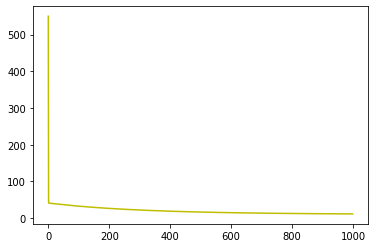

[[92.24256]]


In [ ]:
#다중 선형회귀 실습
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

x=np.array([[73,80,75], [93,88,93],[89,91,90],[96,98,100],[73,66,70]])
y=np.array([72,88,92,100,71])

x_test=np.array([[90,88,93]])

model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd=optimizers.SGD(lr=0.00001)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

hist=model.fit(x, y, batch_size=1, epochs=1000, shuffle=False)

#print(his.history['loss'])
plt.plot(hist.history['loss'], 'y', label='trian loss')
plt.show()
print(model.predict(x_test))

In [26]:
#다중 선형회귀
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data=np.loadtxt('/content/Blood_fat.csv', delimiter=',')

x1=[x_row1[0] for x_row1 in data]
x2=[x_row2[1] for x_row2 in data]
y_data=[y_row[2] for y_row in data]
#기울기 a와 y절편 b의 값을 임의로 정함.
a1=tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2=tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b=tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

y=a1*x1+a2*x2+b
rmse=tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

lr=0.01
gradient_descent=tf.train.GradientDescentOptimizer(lr).minimize(rmse)

epochs=2001
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(epochs):
    sess.run(gradient_descent)
    if step%100==0:
     print('epoch: %.f, RMSE=%.04f, 기울기 a1=%.4f, 기울기 a2=%.4f, y절편 b=%.4f' %(step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))
    if step==epochs-1:
      #2개의 기울기와 절편을 텐서에서 변수에 할당
      da1=sess.run(a1)
      da2=sess.run(a2)
      db=sess.run(b)
      print(da1)
      print(da2)
      print(db)
      print(type(da1))

calc_y=[]
for i in range(25):
  new_y=(da1*x1[i])+(da2*x2[i]+db)
  calc_y.append(new_y)
  print(new_y)
    

epoch: 0, RMSE=88.3118, 기울기 a1=2.1969, 기울기 a2=1.9686, y절편 b=15.8147
epoch: 100, RMSE=42.7880, 기울기 a1=1.2653, 기울기 a2=5.2723, y절편 b=15.8583
epoch: 200, RMSE=42.6781, 기울기 a1=1.1332, 기울기 a2=5.5021, y절편 b=15.8991
epoch: 300, RMSE=42.6759, 기울기 a1=1.1243, 기울기 a2=5.5166, y절편 b=15.9403
epoch: 400, RMSE=42.6742, 기울기 a1=1.1233, 기울기 a2=5.5173, y절편 b=15.9814
epoch: 500, RMSE=42.6725, 기울기 a1=1.1228, 기울기 a2=5.5171, y절편 b=16.0225
epoch: 600, RMSE=42.6708, 기울기 a1=1.1223, 기울기 a2=5.5170, y절편 b=16.0636
epoch: 700, RMSE=42.6692, 기울기 a1=1.1218, 기울기 a2=5.5168, y절편 b=16.1047
epoch: 800, RMSE=42.6675, 기울기 a1=1.1214, 기울기 a2=5.5166, y절편 b=16.1457
epoch: 900, RMSE=42.6658, 기울기 a1=1.1209, 기울기 a2=5.5164, y절편 b=16.1867
epoch: 1000, RMSE=42.6641, 기울기 a1=1.1204, 기울기 a2=5.5162, y절편 b=16.2277
epoch: 1100, RMSE=42.6624, 기울기 a1=1.1200, 기울기 a2=5.5160, y절편 b=16.2687
epoch: 1200, RMSE=42.6608, 기울기 a1=1.1195, 기울기 a2=5.5158, y절편 b=16.3096
epoch: 1300, RMSE=42.6591, 기울기 a1=1.1190, 기울기 a2=5.5156, y절편 b=16.3505
epoch: 1400, RMSE=